<a href="https://colab.research.google.com/github/951237/TIL/blob/master/201025_TIL_%EB%8F%84%EC%84%9C%EB%8C%80%EC%97%AC%ED%98%84%ED%99%A9%EB%B6%84%EC%84%9D_%ED%8C%90%EB%8B%A4%EC%8A%A4_%ED%95%9C%EB%88%88%EC%97%90%EB%A7%8C_%EB%B3%84%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코랩 한글 설정


In [1]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)



# 우선 fm._rebuild() 를 해주고
fm._rebuild()

#폰트 크기 변경
plt.rcParams.update({'font.size': 20})
# plt.rcParams["axes.labelsize"] = 

NanumGothic Eco


## 라이브러리 호출 및 파일 설정

In [18]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
PATH_FILE = '/content/drive/My Drive/data/학현초_도서관 대출관련_200922/이용자별대출통계2017-2020.csv'
PATH_SAVE = '/content/drive/My Drive/data/학현초_도서관 대출관련_200922/result/'

In [20]:
# 데이터 프레임 만들기
df = pd.read_csv(PATH_FILE, header=1, index_col=0)

# 인덱스 날짜 변환
df.index = pd.to_datetime(df.index)
df.head()

# 필요없는 칼럼 삭제
del df['기타']
del df['소계']

In [21]:
# 날짜를 기준으로 필터
df_2017 = df.loc['2017-03-01':'2017-12-31'].copy()
df_2018 = df.loc['2018-03-01':'2018-12-31'].copy()
df_2019 = df.loc['2019-03-01':'2019-12-31'].copy()

## 각 클래스별 가장 책을 빌린 시기와 권수

In [22]:
df.loc[df['교사'].idxmax()].name.date()

datetime.date(2019, 1, 9)

In [23]:
for i in df.columns:
    date = df.loc[df[i].idxmax()].name.date() # 타임스탬프에서 날짜 슬라이싱
    max = df.loc[df[i].idxmax(), i] # 칼럼에서 최대값 구하기
    print(f'{date} {i} : {max}')

2019-01-09 교사 : 147
2017-03-24 1학년 : 120
2017-04-17 2학년 : 72
2017-04-18 3학년 : 75
2019-09-05 4학년 : 67
2019-03-08 5학년 : 70
2017-04-19 6학년 : 55
2018-06-20 학부모 : 11
2017-03-02 지역주민 : 0


## 월별 도서대여 현황 시각화

In [24]:
df_2017_day = df_2017.copy()
df_2018_day = df_2018.copy()
df_2019_day = df_2019.copy()
lst_df_day = [df_2017_day, df_2018_day, df_2019_day]
for df in lst_df_day:
    df['day'] = df.index.day # 인덱스에서 날짜만 슬라이싱해서 칼럼 만들기
    df['month'] = df.index.month # 인덱스어서 월을 슬라이싱해서 칼럼 만들기
    print(df.head())

            교사  1학년  2학년  3학년  4학년  5학년  6학년  학부모  지역주민  day  month
년/월/일                                                              
2017-03-02   1    0    2    0    0    0    0    0     0    2      3
2017-03-03   4    1   14   17    5   12    0    0     0    3      3
2017-03-04   0    0    0    0    0    0    0    0     0    4      3
2017-03-05   0    0    0    0    0    0    0    0     0    5      3
2017-03-06   0    0   12   23    1   10    0    0     0    6      3
            교사  1학년  2학년  3학년  4학년  5학년  6학년  학부모  지역주민  day  month
년/월/일                                                              
2018-03-01   0    0    0    0    0    0    0    0     0    1      3
2018-03-02   0    3    3    3    3    1    0    0     0    2      3
2018-03-03   0    0    0    0    0    0    0    0     0    3      3
2018-03-04   0    0    0    0    0    0    0    0     0    4      3
2018-03-05  13    0    0   17   11   27    0    0     0    5      3
            교사  1학년  2학년  3학년  4학년  5학년  6학년  학부

In [25]:
# 날짜별로 묶어서 값을 모두 더하기
df_2017_daily = df_2017_day.groupby('day').agg(['sum']).reset_index()
df_2018_daily = df_2018_day.groupby('day').agg(['sum']).reset_index()
df_2019_daily = df_2019_day.groupby('day').agg(['sum']).reset_index()
lst_df_daily = [df_2017_daily, df_2018_daily, df_2019_daily]

In [26]:
# 월로 묶어서 값을 모두 더하
df_2017_monthly = df_2017_day.groupby('month').agg(['sum']).reset_index()
df_2018_monthly = df_2018_day.groupby('month').agg(['sum']).reset_index()
df_2019_monthly = df_2019_day.groupby('month').agg(['sum']).reset_index()
lst_df_monthly = [df_2017_monthly, df_2018_monthly, df_2019_monthly]

# 학년별 도서대출 현황


In [27]:
col = ['교사', '1학년', '2학년', '3학년', '4학년', '5학년', '6학년', '학부모']

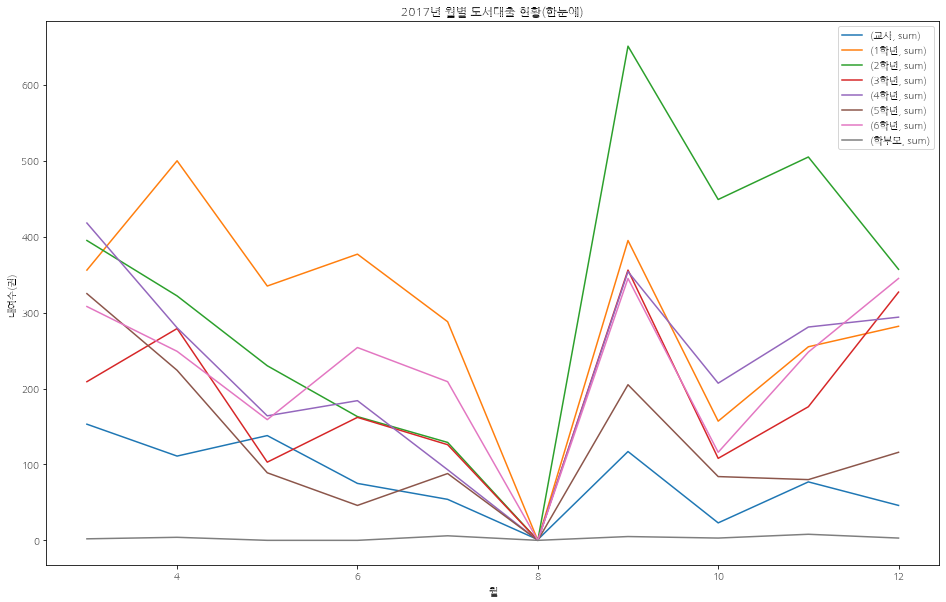

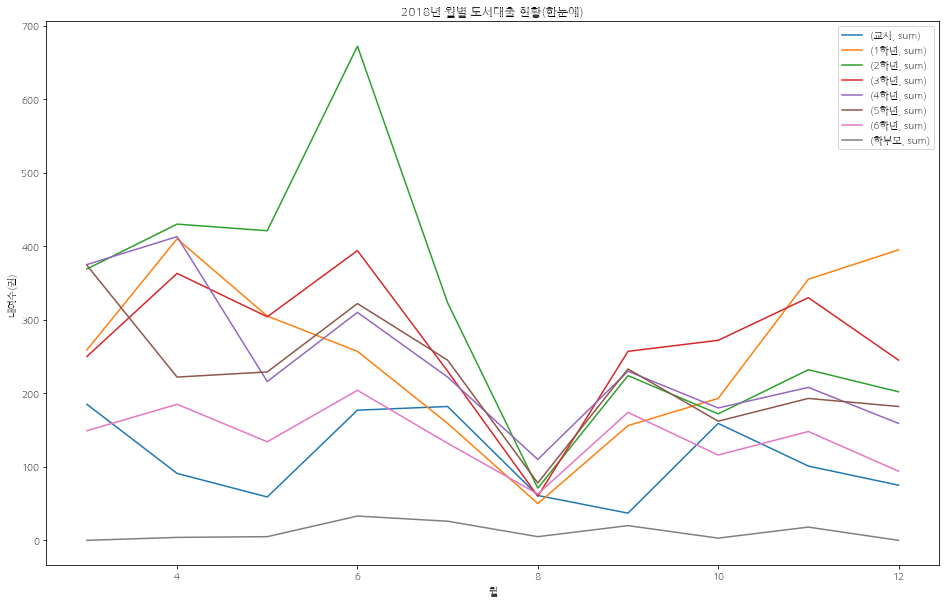

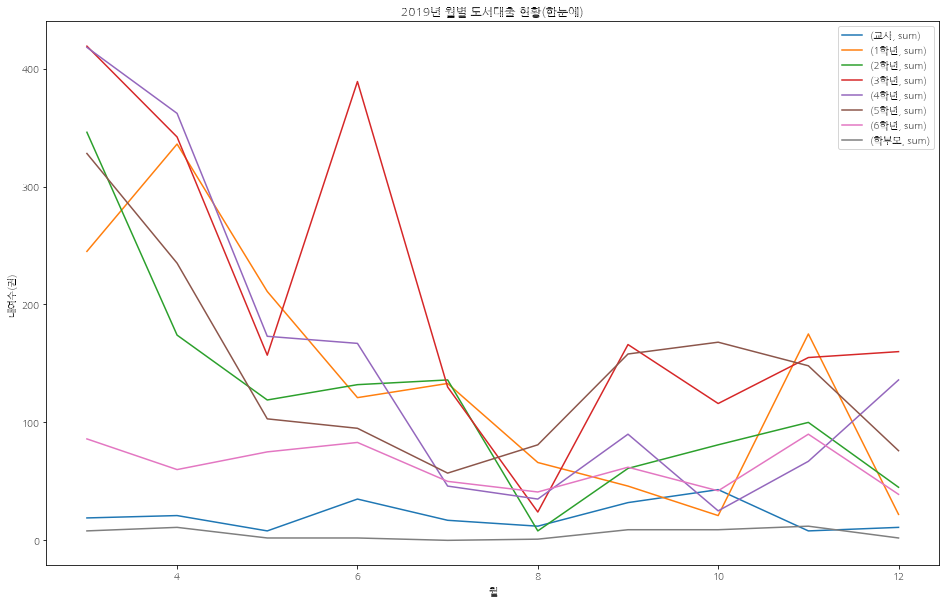

In [28]:
i_year = 2017
for df_i in lst_df_monthly:
    df_i.set_index('month', inplace=True)
    df_i[col].plot(figsize=(16, 10))
    plt.xlabel("월")
    plt.ylabel("대여수(권)")
    plt.legend(loc='best')
    plt.title(f'{i_year}년 월별 도서대출 현황(한눈에)')
    plt.savefig(f'{PATH_SAVE}{i_year}년 월별 도서대출 현황(한눈에)')
    plt.show()
    i_year += 1

## 도서대출 현황 추이 그래프로 표현

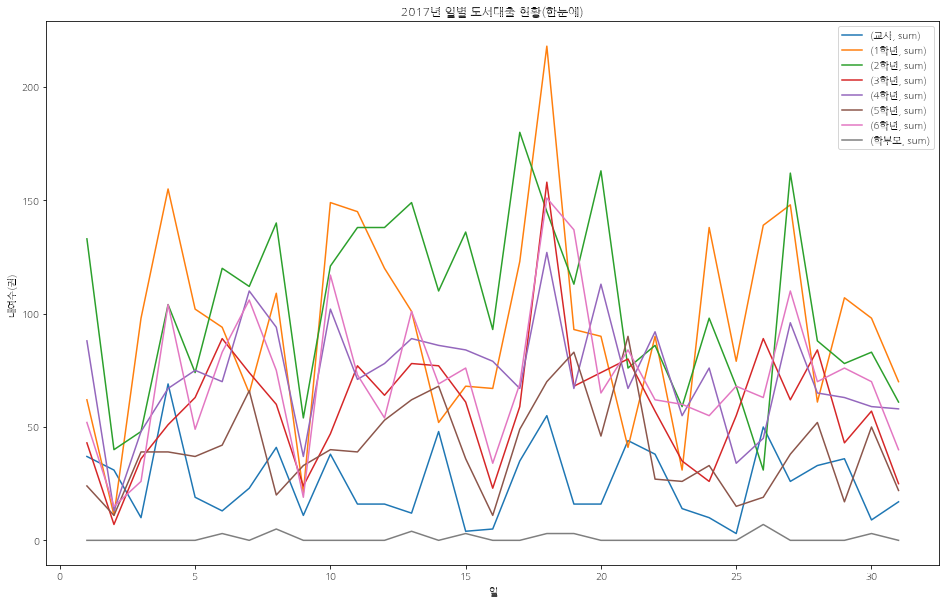

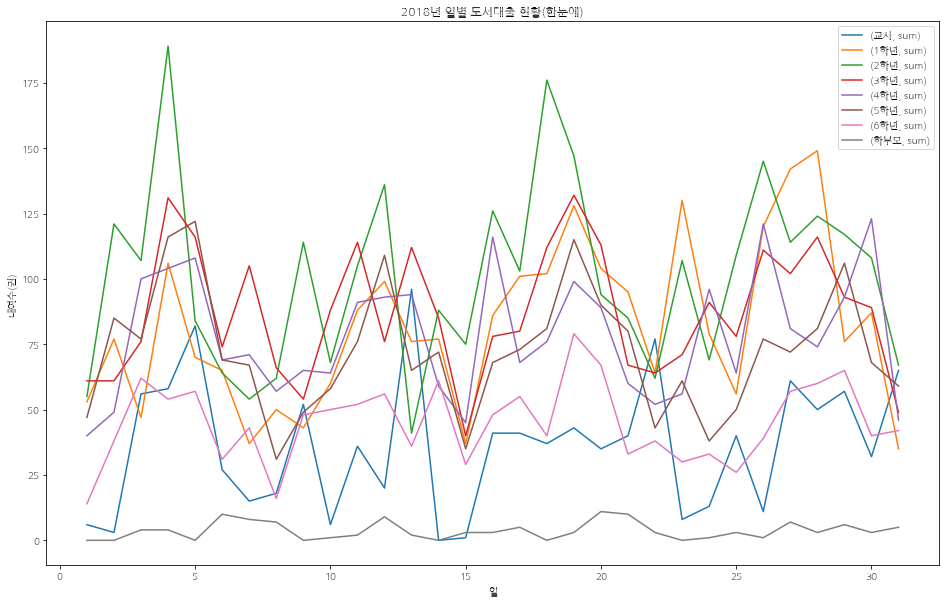

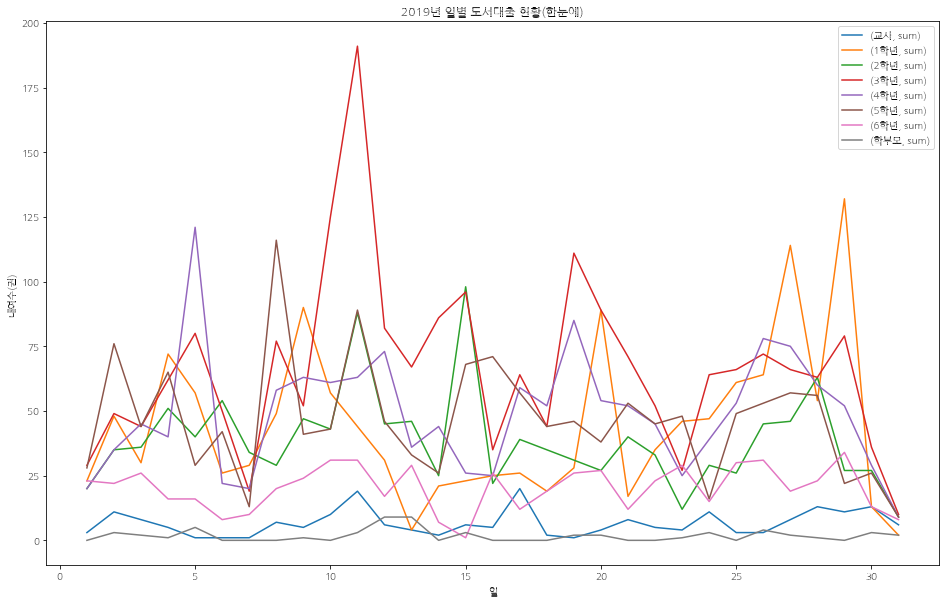

In [29]:
i_year = 2017
for df_i in lst_df_daily:
    df_i.set_index('day', inplace=True)
    df_i[col].plot(figsize=(16, 10))
    plt.xlabel("일")
    plt.ylabel("대여수(권)")
    plt.legend(loc='best')
    plt.title(f'{i_year}년 일별 도서대출 현황(한눈에)')
    plt.savefig(f'{PATH_SAVE}{i_year}년 일별 도서대출 현황(한눈에)')
    plt.show()
    i_year += 1

# 코딩연습장

In [ ]:
df.columns

Index(['년/월/일', '교사', '1학년', '2학년', '3학년', '4학년', '5학년', '6학년', '학부모', '지역주민',
       '기타', '소계'],
      dtype='object')